In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
df = pd.read_csv('/home/alma/Documentos/xPrize/data/OxCGRT_latest.csv')

/home/alma/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Change blank space by _ in columns
df.rename(columns=lambda x: x.replace(' ','_').replace('/','_'), inplace=True)

In [4]:
#Assignate the correct type
df.Date = pd.to_datetime(df['Date'], format='%Y%m%d')
df = df.astype({'C1_School_closing':'category', 'C2_Workplace_closing':'category', 
           'C3_Cancel_public_events':'category','C4_Restrictions_on_gatherings':'category',
           'C5_Close_public_transport':'category', 'C6_Stay_at_home_requirements':'category', 
           'C7_Restrictions_on_internal_movement':'category', 'C8_International_travel_controls':'category', 
           'E1_Income_support':'category', 'E2_Debt_contract_relief':'category', 'E3_Fiscal_measures':'category', 
           'E4_International_support':'category', 'H1_Public_information_campaigns':'category', 
           'H2_Testing_policy':'category', 'H3_Contact_tracing':'category', 
           'H4_Emergency_investment_in_healthcare':'category', 'H5_Investment_in_vaccines':'category', 
           'H6_Facial_Coverings':'category', 'M1_Wildcard':'category'})

In [5]:
df.shape

(89570, 47)

In [6]:
df[df.RegionName.isna() == False].CountryName.unique()

array(['Brazil', 'United Kingdom', 'United States'], dtype=object)

In [7]:
#Number of nan
for col in df.columns:
    print(col, df[col].isnull().sum())

CountryName 0
CountryCode 0
RegionName 61516
RegionCode 61516
Jurisdiction 0
Date 0
C1_School_closing 4156
C1_Flag 26874
C2_Workplace_closing 4568
C2_Flag 31473
C3_Cancel_public_events 4573
C3_Flag 27668
C4_Restrictions_on_gatherings 4571
C4_Flag 31366
C5_Close_public_transport 4553
C5_Flag 53312
C6_Stay_at_home_requirements 4865
C6_Flag 38293
C7_Restrictions_on_internal_movement 4020
C7_Flag 40028
C8_International_travel_controls 4150
E1_Income_support 11910
E1_Flag 46053
E2_Debt_contract_relief 12627
E3_Fiscal_measures 24081
E4_International_support 23266
H1_Public_information_campaigns 4534
H1_Flag 15937
H2_Testing_policy 4353
H3_Contact_tracing 4625
H4_Emergency_investment_in_healthcare 23999
H5_Investment_in_vaccines 23813
H6_Facial_Coverings 4630
H6_Flag 36451
M1_Wildcard 89570
ConfirmedCases 8157
ConfirmedDeaths 8291
StringencyIndex 4906
StringencyIndexForDisplay 4098
StringencyLegacyIndex 4906
StringencyLegacyIndexForDisplay 4098
GovernmentResponseIndex 12643
GovernmentResponse

In [11]:
df.Date.dtypes

dtype('<M8[ns]')

In [14]:
#Create new variables for day, month and year
df['Month'] = df.Date.apply(lambda x: x.month)
df['Year'] = df.Date.apply(lambda x: x.year)
df['Day'] = df.Date.apply(lambda x: x.day)

In [22]:
df_na = df[df['ConfirmedCases'].isna()]
confirmed_cases_month_na = df_na.groupby('Month')['ConfirmedCases'].size()
confirmed_cases_na = df_na.groupby('Date')['ConfirmedCases'].size()

<AxesSubplot:xlabel='Month'>

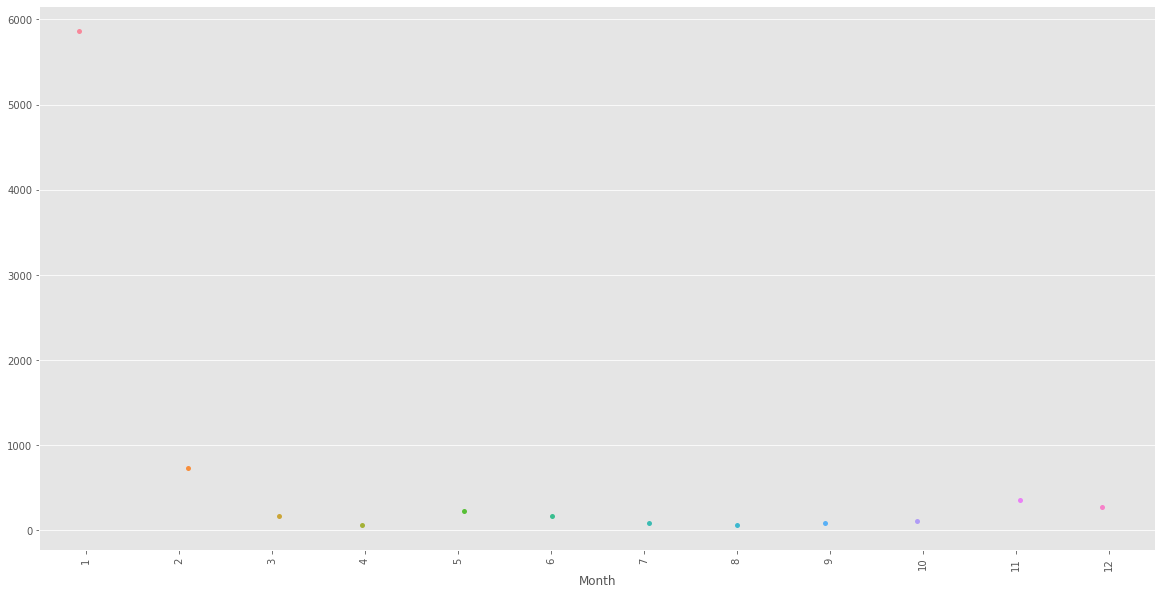

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=confirmed_cases_month_na[confirmed_cases_month_na.values > 0].index, y=confirmed_cases_month_na[confirmed_cases_month_na.values > 0].values)

<AxesSubplot:xlabel='Date'>

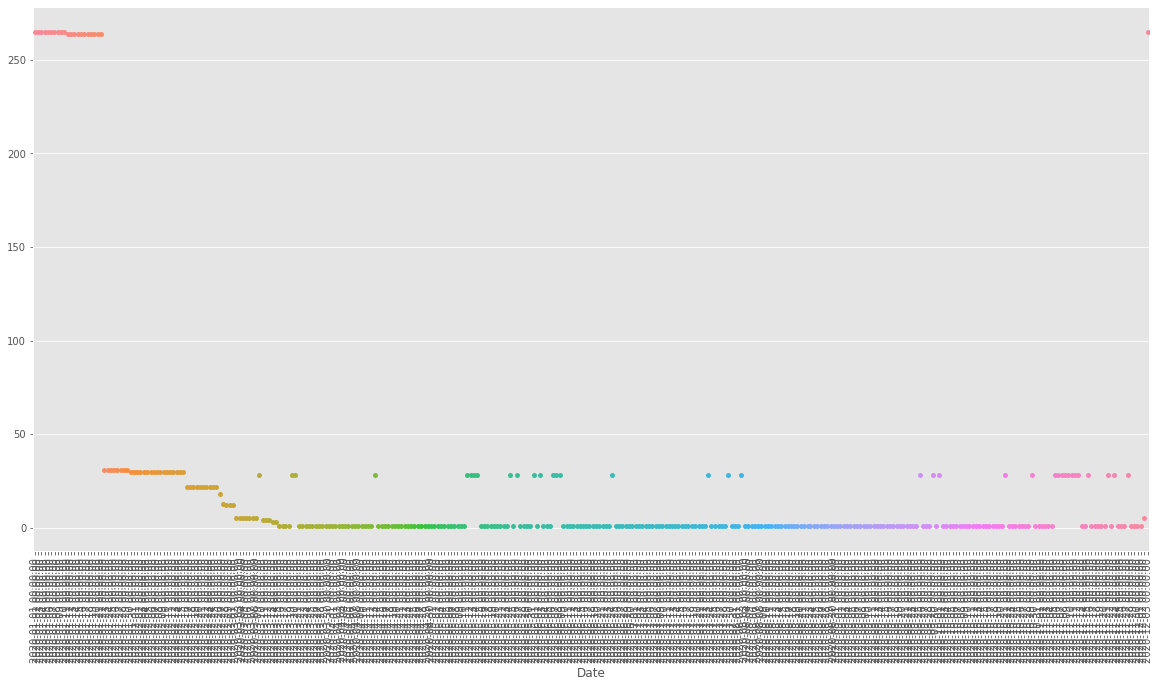

In [24]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=confirmed_cases_na[confirmed_cases_na.values > 0].index, y=confirmed_cases_na[confirmed_cases_na.values > 0].values)

In [16]:
#Jurisdiction can be dropped
df[df.Jurisdiction=='STATE_TOTAL']
#df.drop(['Jurisdiction'], axis=1)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
7774,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7775,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7776,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7777,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7778,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86523,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-11-29,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86524,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-11-30,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86525,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-01,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86526,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-02,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Fill NaN values by 0
df.C1_School_closing.fillna(0, inplace=True)
df.C2_Workplace_closing.fillna(0, inplace=True)
df.C3_Cancel_public_events.fillna(0, inplace=True)
df.C4_Restrictions_on_gatherings.fillna(0, inplace=True)
df.C5_Close_public_transport.fillna(0, inplace=True)
df.C6_Stay_at_home_requirements.fillna(0, inplace=True)
df.C7_Restrictions_on_internal_movement.fillna(0, inplace=True)
df.C8_International_travel_controls.fillna(0, inplace=True)
df.E1_Income_support.fillna(0, inplace=True)
df.E2_Debt_contract_relief.fillna(0, inplace=True)
df.E3_Fiscal_measures.fillna(0, inplace=True)
df.E4_International_support.fillna(0, inplace=True)
df.H1_Public_information_campaigns.fillna(0, inplace=True)
df.H2_Testing_policy.fillna(0, inplace=True)
df.H3_Contact_tracing.fillna(0, inplace=True)
df.H4_Emergency_investment_in_healthcare.fillna(0, inplace=True)
df.H5_Investment_in_vaccines.fillna(0, inplace=True)
df.H6_Facial_Coverings.fillna(0, inplace=True)
df.M1_Wildcard.fillna(0, inplace=True)

In [22]:
#Only two countries has null values between march and november. So fill values with 0 
#and in december fill by the last data of november
df[(df.ConfirmedCases.isna()) & (df.Date > '2020-03-01') & (df.Date < '2020-11-30')].CountryName.unique()
df[df.Date < '2020-11-30'].fillna(0, inplace=True)
df[df.Date >= '2020-11-30'].fillna(df., inplace=True)

array(['Brazil', 'Turkmenistan'], dtype=object)

In [8]:
len(df.ConfirmedDeaths.unique())

11395